<a href="https://colab.research.google.com/github/ouafighizlene21/ml-credit-defaults/blob/main/MLbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Installation de la bibliothèque skorecard
# 📦 Installation of the skorecard library


In [ ]:
!pip install skorecard

# 📚 Importation des bibliothèques nécessaires pour le projet  
# 📚 Importing the necessary libraries for the project


In [ ]:
import pandas as pd
import numpy as np
from skorecard.datasets import load_uci_credit_card
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

## 📊 Première étape : Chargement et exploration des données
# 📊 Step 1: Data loading and initial exploration

# 📥 Chargement du dataset depuis l'URL et renommage de la colonne cible  
# 📥 Loading the dataset from the URL and renaming the target column


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

df.rename(columns={"default payment next month": "default"}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 🔍 Dimensions du dataset (lignes, colonnes)  
# 🔍 Dataset dimensions (rows, columns)


In [ ]:
df.shape

(30000, 25)

# Répartition des catégories de la variable 'MARRIAGE'  
# Distribution of 'MARRIAGE' variable categories


In [ ]:
df['MARRIAGE'].value_counts()


,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


# Valeurs uniques dans la colonne 'MARRIAGE'  
# Unique values in the 'MARRIAGE' column


In [ ]:
df['MARRIAGE'].unique()


array([1, 2, 3, 0])

In [ ]:
df['SEX'].unique()


array([2, 1])

In [ ]:
df['AGE'].unique()


array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

# ℹ️ Informations générales sur le DataFrame  
# ℹ️ General information about the DataFrame


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

# 📊 Statistiques descriptives des variables numériques  
# 📊 Descriptive statistics of numerical variables


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Répartition des sexes dans le dataset  
# Gender distribution in the dataset


In [ ]:
df['SEX'].value_counts()


,count
SEX,
2,18112
1,11888


In [ ]:
df['default'].value_counts(normalize=True)


,proportion
default,
0,0.7788
1,0.2212


# 📊 Distribution de l'âge des clients  
# 📊 Age distribution of clients


<Axes: >

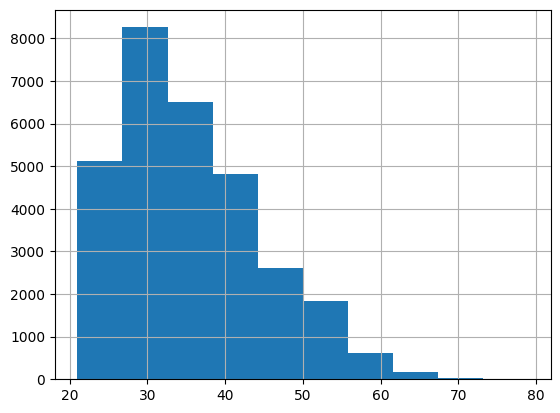

In [ ]:
df['AGE'].hist()                  # Histogramme de l’âge

# 📦 Analyse du montant du crédit avec une boîte à moustaches  
# 📦 Credit limit analysis using boxplot


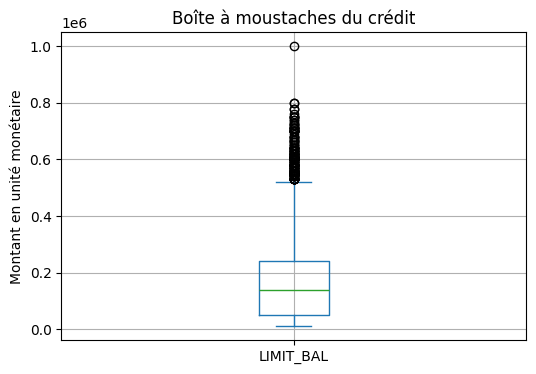

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['LIMIT_BAL'].plot.box()
plt.title("Boîte à moustaches du crédit")
plt.ylabel("Montant en unité monétaire")
plt.grid(True)
plt.show()
df['LIMIT_BAL'].describe()

# 📊 Visualisation de la répartition des défauts de paiement  
# 📊 Visualization of payment default distribution


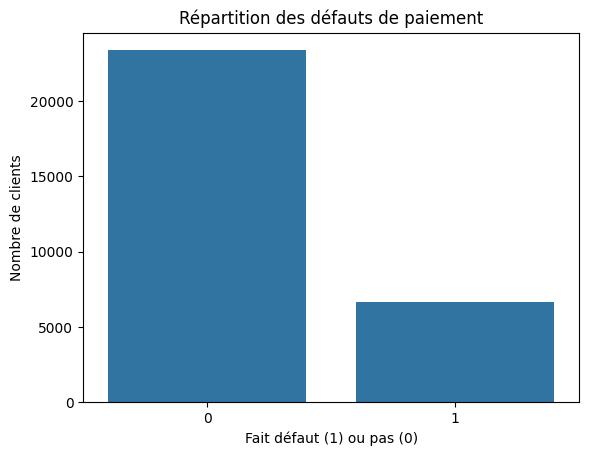

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default', data=df)
plt.title('Répartition des défauts de paiement')
plt.xlabel('Fait défaut (1) ou pas (0)')
plt.ylabel('Nombre de clients')
plt.show()


# 📊 Analyse de l’âge selon le statut de défaut de paiement  
# 📊 Age distribution by default status


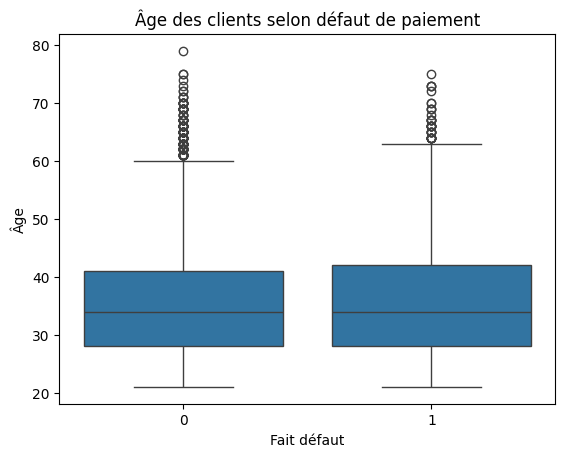

In [ ]:
sns.boxplot(x='default', y='AGE', data=df)
plt.title('Âge des clients selon défaut de paiement')
plt.xlabel('Fait défaut')
plt.ylabel('Âge')
plt.show()


## 🧹 Deuxième étape : Nettoyage des données (Data Cleaning)  
# 🔍 Vérification des valeurs manquantes  
# 🔍 Checking for missing values


In [ ]:
df.isnull().sum()


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


## 🔢 Analyse des variables catégorielles codées (EDUCATION & MARRIAGE)
# 🧮 Analyzing coded categorical variables


In [ ]:
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)  # 4 = autres/inconnus


## 🧾 Types de données par colonne  
# 🧾 Data types of each column


In [ ]:
df.dtypes


,0
ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


## 🧹 Regroupement des catégories rares ou inconnues dans 'EDUCATION'
# 🧹 Grouping rare or unknown categories in 'EDUCATION'


In [ ]:
print(df['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


## 🔍 Détection des doublons dans les données  
# 🔍 Detecting duplicate entries in the dataset


In [ ]:
df.duplicated().sum()


0

## 📊 Répartition des classes de la variable cible  
# 📊 Distribution of target variable classes


In [ ]:
df['default'].value_counts(normalize=True)


,proportion
default,
0,0.7788
1,0.2212


## 📈 Statistiques descriptives du dataset  
# 📈 Descriptive statistics of the dataset


In [ ]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 🏗️ Étape 3 : Préparation des variables  
### Step 3: Preparing features and target


## 🎯 Séparation des variables explicatives et de la cible  
# 🎯 Splitting features and target variable


In [ ]:
X = df.drop(columns='default')  # Tout sauf la cible
y = df['default']               # Cible (0 ou 1)


## 🔍 Vérification des valeurs manquantes  
# 🔍 Checking for missing values


In [ ]:
df.isnull().sum()


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


## 📊 Boîte à moustaches du montant de crédit (LIMIT_BAL)  
# 📊 Boxplot of credit amount (LIMIT_BAL)


<Axes: >

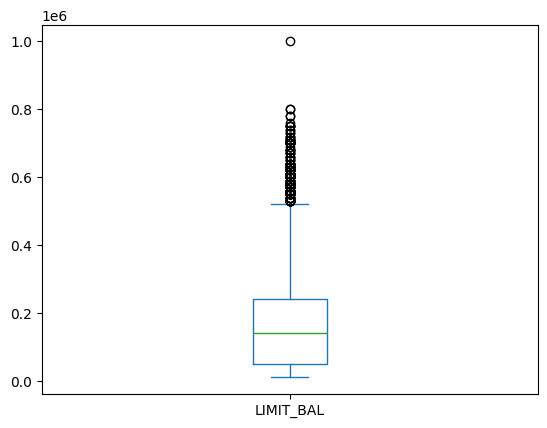

In [ ]:
df['LIMIT_BAL'].plot.box()


## ✂️ Étape 4 : Séparation en ensemble d'entraînement et de test  
### ✂️ Step 4: Train-test split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🌲 Étape 5 : Entraînement du modèle  
### 🌲 Step 5: Model training


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 🧠 Prédiction sur les données de test  
# 🧠 Prediction on test data


In [ ]:
y_pred = model.predict(X_test)


## 📈 Étape 6 :  Évaluation du modèle : matrice de confusion et rapport de classification  
# 📈 Step 6: Model evaluation: confusion matrix and classification report



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4424  263]
 [ 842  471]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



## 🔍 Visualisation de la matrice de confusion  
# 🔍 Confusion matrix visualization


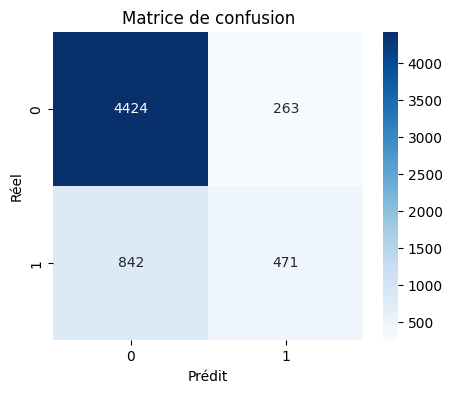

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()


## ⚙️ Standardisation des données  
# ⚙️ Data Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## 💾 Étape 7 : Sauvegarde et rechargement du modèle  
### 💾 Step 7: Saving and loading the model


In [ ]:
import joblib
joblib.dump(model, 'credit_default_model.pkl')


['credit_default_model.pkl']

## 📤 Chargement du modèle sauvegardé  
# 📤 Loading the saved model


In [ ]:
model = joblib.load('credit_default_model.pkl')
